<a href="https://colab.research.google.com/github/RichardTesla/datal/blob/main/Forecasting_Prices_Agricultural_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Theme : Agriculture


###Analyzing Trends and Forecasting the Prices Of Agricultural Products(Onions) in the UK using Time Series Analysis

Project Description: The primary objective of this undertaking is to conceptualize and construct a data science product that leverages time series analysis methodologies to scrutinize patterns and predict future agricultural prices in the UK. The Agricultural Price Indices dataset, containing a range of price indices for assorted agricultural products in the UK, will be employed for this purpose. The project's exclusive focus is on analyzing the price trends and forecasting future prices of Onions, a specific agricultural product.

####Exploratory Data Analysis

Exploratory Data Analysis (EDA): is the process of exploring and analyzing data to understand its characteristics and extract insights from it. It is an important first step in any data analysis project as it helps to identify patterns, relationships, and anomalies in the data.

The process of EDA typically involves the following steps:

I. Data collection: Gathering the data from various sources such as databases, APIs, or files.

II. Data cleaning: Checking the data for any errors or missing values and correcting or removing them.

III. Data transformation: Converting the data into a suitable format for analysis, such as converting categorical variables into numerical ones.

IV. Data visualization: Creating graphs and charts to visualize the data and identify any patterns or trends.

V. Data analysis: Using statistical methods and machine learning algorithms to gain insights and draw conclusions from the data.

EDA is an important step in this data science project as it helps to identify any issues with the data, understand the relationships between variables, and gain insights that can inform further analysis.

In this section I carried out The EDA on the price index of Onions

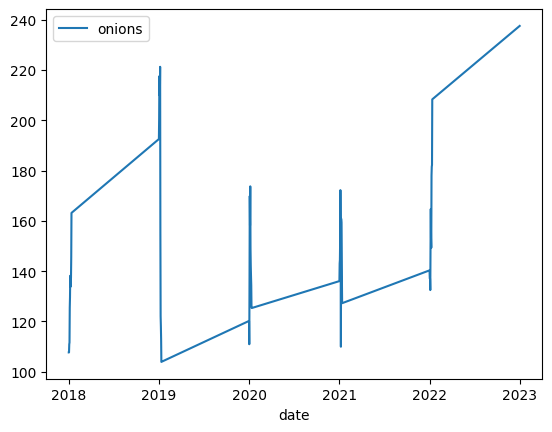

              onions
date                
2023-01-01  237.5025
2022-01-12  208.3080
2022-01-11  182.2242
2022-01-10  181.5382
2022-01-09  177.9462
              onions
date                
2018-01-05  125.4571
2018-01-04  111.6204
2018-01-03  110.9453
2018-01-02  107.6822
2018-01-01  107.6822
           onions
count   61.000000
mean   149.255652
std     31.803477
min    103.908100
25%    127.260800
50%    142.299900
75%    163.154900
max    237.502500
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2023-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   onions  61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes
None
onions    0
dtype: int64


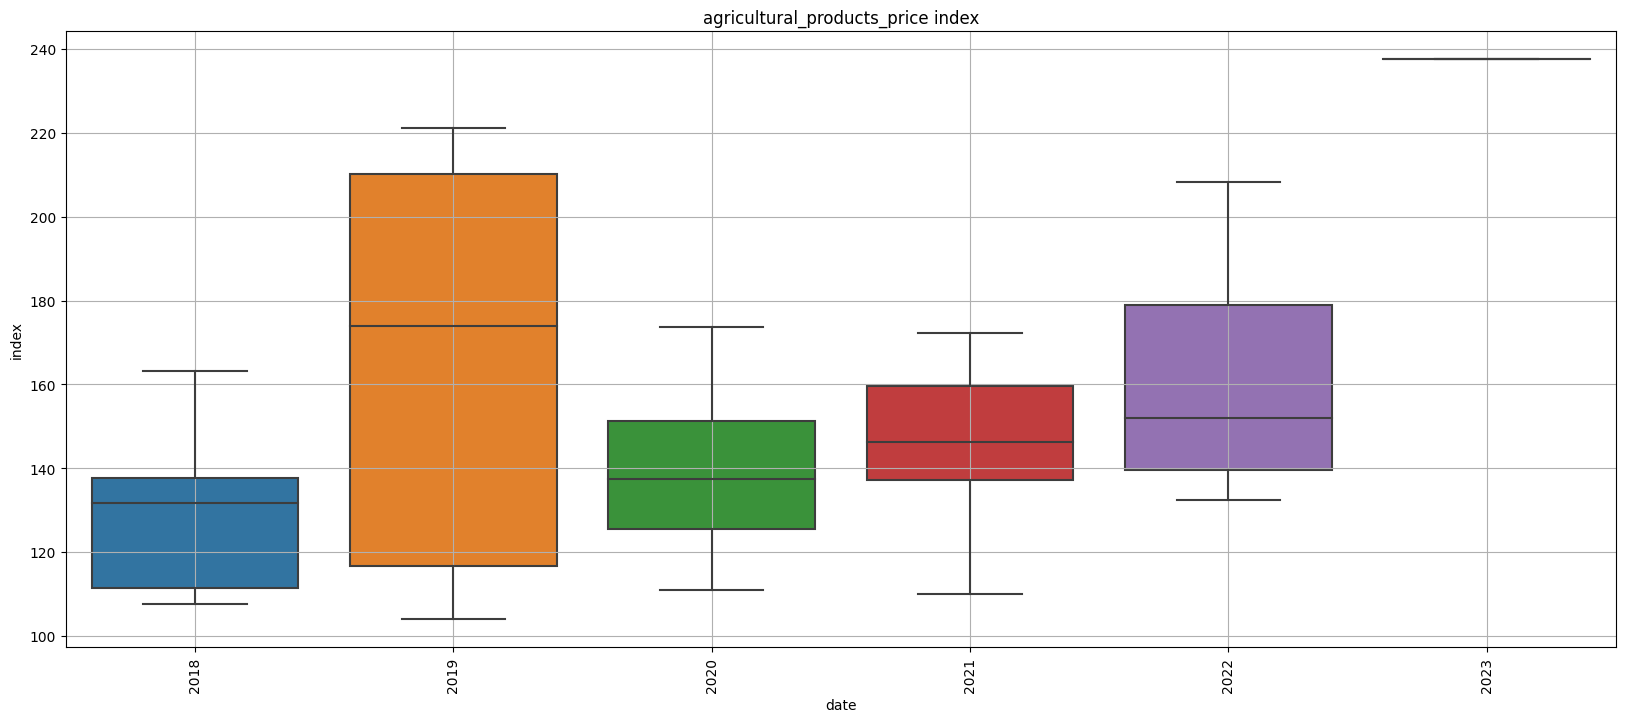

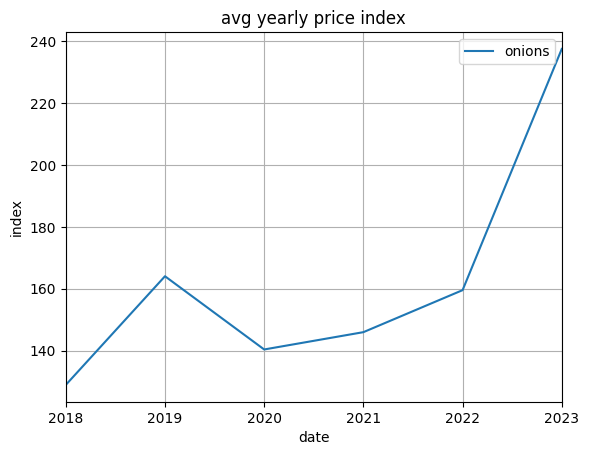

In [ ]:

#Exploratory Data Analysis
#Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import seaborn as sns


#from google.colab import files

#uploaded = files.upload()


 #Read data from CSV file
df = pd.read_csv('Agric_price.csv', index_col='date', parse_dates= True)
sns.lineplot(df)
plt.show()
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())
print(df.isnull(  ).sum())
fig, ax = plt.subplots(1,1,figsize=(20,8))
#boxplot of Onions price index, NB: you can get the box plot of eggs and pototoes by changing the number in the boc plot code below
sns.boxplot(x=df.index.year, y=df.values[:, 0], ax=ax)
plt.title('agricultural_products_price index')
plt.xlabel('date')
plt.ylabel('index')
plt.xticks(rotation = 90)
plt.grid();
df_yearly_sum =df.resample('A').mean()
df_yearly_sum.plot();
plt.title('avg yearly price index')
plt.xlabel('date')
plt.ylabel('index')
plt.grid();





Based on the results obtained from the exploratory data analysis, it appears that the time series is stationary. However, additional tests will be conducted to validate this finding and ensure its accuracy.

### Stationarity

Stationarity is a crucial aspect of time series analysis. Essentially, stationarity refers to the constancy of the way in which time series data changes over time. A time series that is stationary will exhibit no discernible trends or seasonal patterns. It is important to check for stationarity because not only does it simplify the process of modeling time series data, but it is also a fundamental assumption underlying many popular time series techniques, such as autoregressive moving average (ARMA), autoregressive integrated moving average (ARIMA), and seasonal ARIMA (SARIMA).

To test for stationarity, I will employ the Dickey-Fuller test, which generates critical values and a p-value that enable me to either accept or reject the null hypothesis that the data is non-stationary. If I reject the null hypothesis, I accept the alternative hypothesis, which posits that the data is stationary.

These critical values and p-value help me to determine the extent to which changes in present values are related to past values. If the data is non-stationary, changes in present values will not have a significant impact on past values.

In [ ]:
# checking for stationarity using the ADf test
result = adfuller((df['onions']))

# the p-value is the fourth element of the result tuple
p_value = result[1]

# compare the p-value to a significance level (e.g., 0.05) to determine stationarity
if p_value < 0.05:
    print('Time series data is stationary')
else:
    print('Time series data is non-stationary')

result = adfuller(df['onions'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


Time series data is stationary
ADF Statistic: -3.180614
p-value: 0.021135
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


**ADF Test**

The Augmented Dickey-Fuller (ADF) test is a statistical test commonly used to determine whether a time series is stationary or non-stationary. This test is based on the assumption that a non-stationary time series can be transformed into a stationary time series by differencing the series.

The ADF test involves estimating the following regression equation:

Δy_t = α + βt + γy_{t-1} + δ_1Δy_{t-1} + ... + δ_{p-1}Δy_{t-p+1} + ɛ_t

where:

Δy_t represents the first difference of the time series
α is the intercept term
β is the coefficient on time
y_{t-1} is the lagged value of the time series
Δy_{t-1} through Δy_{t-p+1} are lagged differences of the time series up to order p-1
ɛ_t is the error term
The null hypothesis of the ADF test is that the time series is non-stationary (i.e., has a unit root), while the alternative hypothesis is that the time series is stationary. The test statistic is then compared to a critical value at a specified level of significance. If the test statistic is less than the critical value, we can reject the null hypothesis and conclude that the time series is stationary.



Result: Based on the ADF test conducted above, the result confirms that the time series is stationary.

**ACF and PACF**

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are graphical tools used in time series analysis to identify the correlation and dependence between observations in a time series.

The ACF plot shows the correlation between each observation in the time series with its lagged values. The PACF plot shows the correlation between each observation with its lagged values, while taking into account the correlations due to the intervening lags.

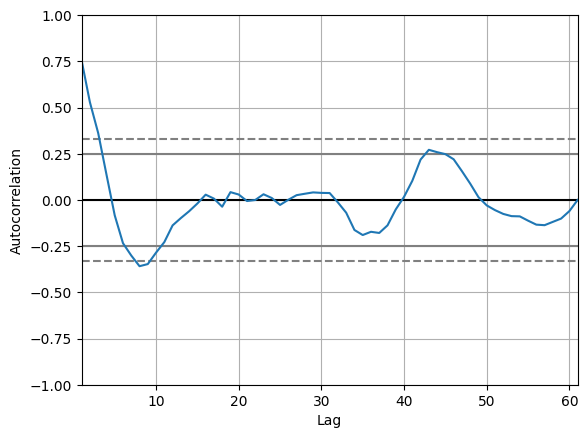

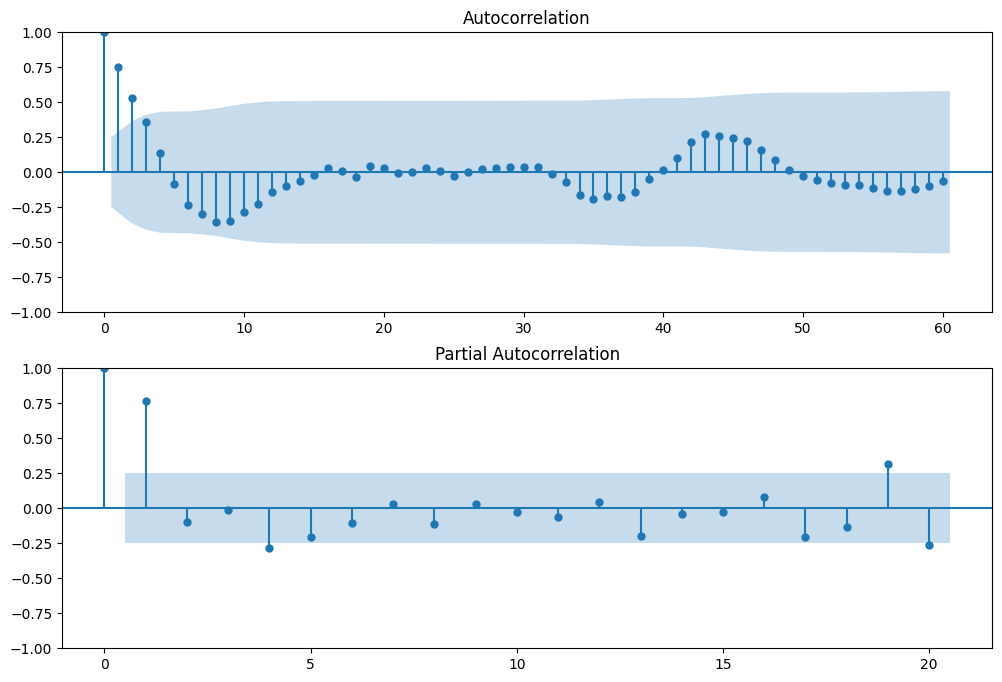

In [ ]:
# Plot the ACF and PACF plots of the time series
autocorrelation_plot(df)
fig, ax = plt.subplots(2,1,figsize=(12,8))
plot_acf(df, ax=ax[0], lags=60)
plot_pacf(df, ax=ax[1], lags=20)
plt.show()
plt.show()



Interpretation: Based on the ACF and PACF plots presented above, I have inferred that there is a gradual decay towards period 5 on the ACF plot and a significant spike at period 1 on the PACF plot. These findings confirms that the Time Series is stationary and we can use the ARIMA model for this Time Series.

**Decomposition**

Decomposition is a statistical technique used to break down a time series dataset into its individual components, namely trend, seasonality, and residual (or error) components. The decomposition process is typically used to better understand the underlying patterns and trends within the data, and to create a more accurate forecast of future values.

The trend component of a time series represents the long-term pattern or direction of the data. It can be upward, downward, or flat. The seasonality component represents the pattern that repeats itself within a fixed time period, such as weekly, monthly, or yearly cycles. The residual component represents the random or unpredictable fluctuations in the data that are not accounted for by the trend or seasonality components.

The decomposition process involves separating these components by applying mathematical methods such as moving averages, exponential smoothing, or regression analysis. Once the individual components are identified and separated, they can be analyzed and modeled independently.

Decomposition is a useful tool for time series analysis, as it can help to identify patterns that may not be immediately visible in the raw data. It can also be used to remove seasonality and trend components from the data, making it easier to model and forecast future values.

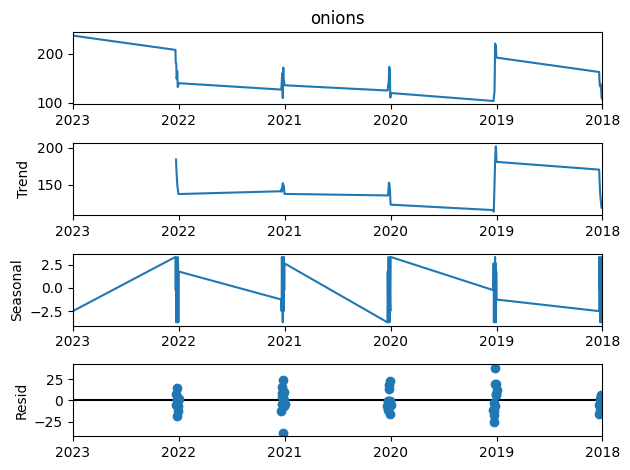

In [ ]:
#Decomposition
decompose = seasonal_decompose(df['onions'],model='additive', period=7)
decompose.plot()
plt.show()

Interpretation: Based on the results above it is observed that the Trend component is flat and the seasonal component is irregular these findings suggest that the time series is stationary with no specific seasonal pattern.

### Fitting The ARIMA Model to Data

**ARIMA MODEL**

ARIMA is a statistical model that utilizes time series data to improve the comprehension of the dataset or make forecasts of upcoming trends. In an autoregressive model, future values are predicted based on past values.

The Autoregressive Integrated Moving Average (ARIMA) model is a type of regression analysis that evaluates the relationship between one dependent variable and other changing variables. Its primary objective is to predict future movements of data series by examining the differences between values in the series, rather than actual values.

To understand the ARIMA model, we can break it down into its individual components. Firstly, the Autoregression (AR) component refers to a model that shows a changing variable that is dependent on its previous values. The Integrated (I) component represents the differencing of raw observations to achieve a stationary time series. In other words, the data values are replaced by the difference between the data values and their previous values. Finally, the Moving Average (MA) component considers the relationship between an observation and a residual error from a moving average model applied to lagged observations.

To describe the parameters of an ARIMA model, each component is represented by a standard notation and functions as a parameter. The standard notation for an ARIMA model is ARIMA (p, d, q), where the parameters are replaced by integer values indicating the type of ARIMA model being used. The parameters have specific meanings:

p: represents the number of lag observations, or the lag order, included in the model.
d: represents the number of times the raw observations are differenced, also known as the degree of differencing.
q: represents the size of the moving average window, or the order of the moving average.
For instance, a linear regression model has terms that vary in type and number. A parameter value of zero (0) indicates that a specific component should not be used in the model. Thus, an ARIMA model can be constructed to perform as an ARMA model or even simpler AR, I, or MA models.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

                               SARIMAX Results                                
Dep. Variable:                 onions   No. Observations:                   61
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -259.238
Date:                Wed, 26 Apr 2023   AIC                            534.475
Time:                        10:03:31   BIC                            551.362
Sample:                             0   HQIC                           541.093
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.7476      8.663     17.401      0.000     133.768     167.727
ar.L1          1.1457      0.967      1.185      0.236      -0.750       3.041
ar.L2         -0.3459      0.945     -0.366      0.7

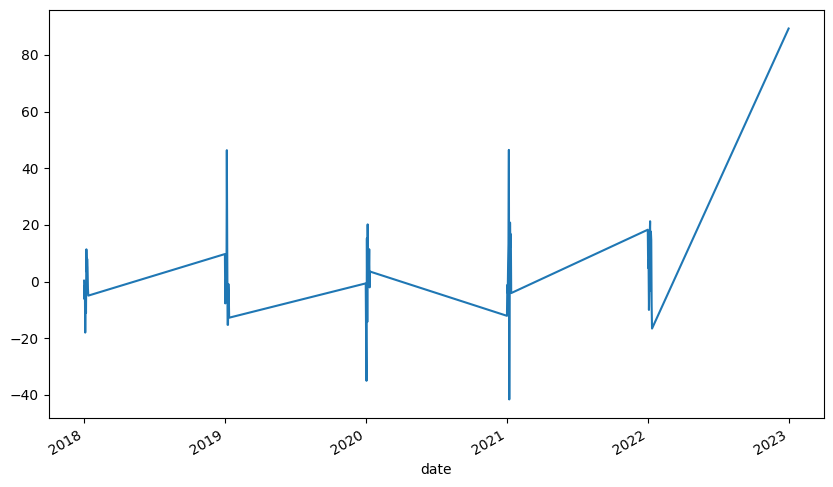

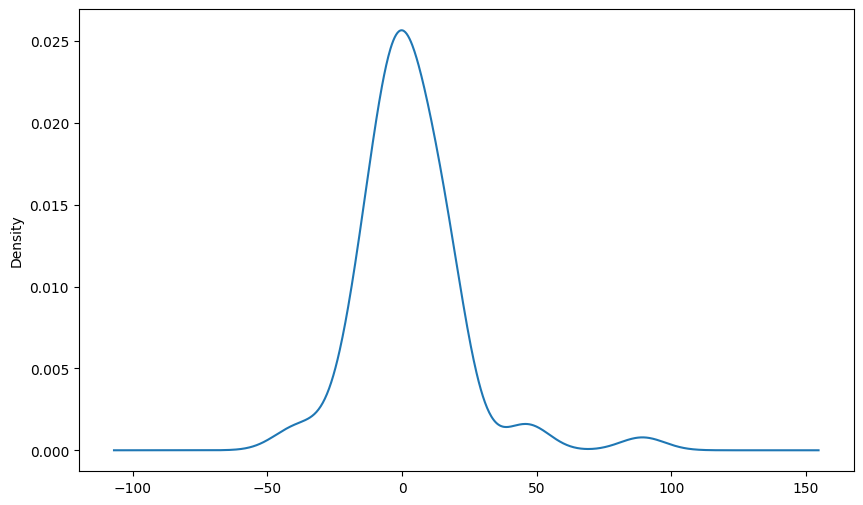

In [ ]:
model = sm.tsa.arima.ARIMA(df, order=(5,0,1))
results = model.fit()
print(results.summary())

#residuals = results.resid
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()


Interpretation:
The analysis above reveals that the ARIMA model employed in this study is characterized by the parameters (5,0,1). This implies that the number of lag observations (p) is set at 5, the degree of differencing (d) is 0, and the order of the moving average (q) is 1. It is worth noting that the decision to set d to zero was informed by the fact that the time series data was observed to be stationary, implying that the mean and variance of the data were constant over time. Additionally, the choice of p and q was based on the results of the autocorrelation and partial autocorrelation functions. By employing this ARIMA model, it is expected that the future values of the time series can be accurately predicted based on the observed patterns in the historical data.

### Forecast ARIMA Model

2023-02-01    115.700190
2023-03-01    123.177767
2023-04-01    135.580555
2023-05-01    146.238746
2023-06-01    157.543939
2023-07-01    166.378948
2023-08-01    172.112838
2023-09-01    176.279932
2023-10-01    176.618918
2023-11-01    175.633698
2023-12-01    172.740579
Freq: MS, Name: predicted_mean, dtype: float64


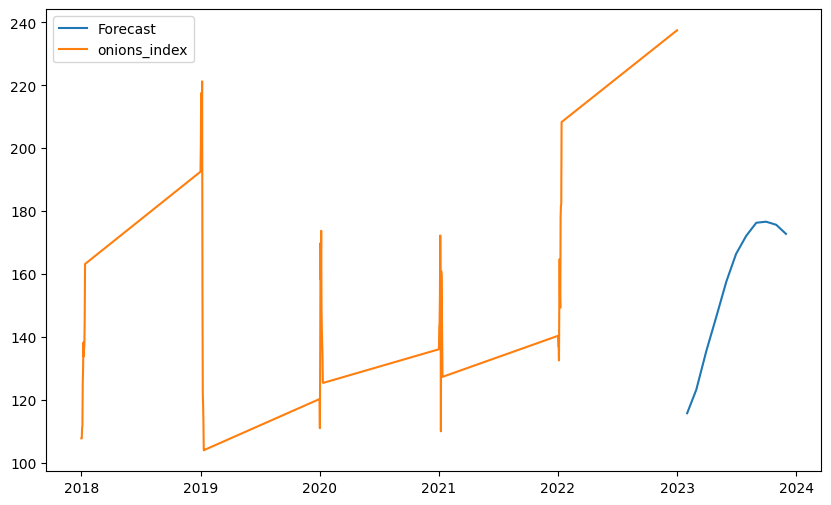

In [ ]:
# Make predictions for future time periods
forecast = results.forecast(steps=11, dynamic=True, index=index)

# Print the forecast with dates
print(forecast)

#plot for forecast
plt.plot(forecast, label='Forecast')
plt.plot(df, label='onions_index')
plt.legend()
plt.show()